# Google Play Store Exploration

In this project, we will explore the dataset provided by <a href="https://www.kaggle.com/">Kaggle.com</a> where you can the dataset from <a href='https://www.kaggle.com/lava18/google-play-store-apps'>here</a>. Our goal is to explore the english language apps that less than $30, and to find relationships between major attributes such as Category and Price.

## Data Cleaning


##### Import tools

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Read dataset

In [2]:
android = pd.read_csv('googleplaystore.csv')

In [3]:
def data_explore(data):
    print('There are ',data.shape[0], 'rows and', data.shape[1],'columns')
    return data.head(5)
data_explore(android)

There are  10841 rows and 13 columns


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Drop NaN and duplicated rows

In [4]:
android = android.drop(10472,axis=0)                             ### Row 10472 contains wrong data
android = android.drop_duplicates('App')
android = android.dropna()

### Data cleaning process

- Remove non-english apps
- Remove apps cost more than \$30
- Convert column Installs into a float type
- Convert column Reviews into a integer type
- Remove '$' from colum Price and convert into float type
- Convert column Size into size in kbs instead of mb and kb



In [5]:
def english_check(word):
    non_english = 0
    for character in word:
        if ord(character) > 127:
            non_english += 1
    if non_english > 3:
        return False
    else:
        return True

def kb_convert(size):
    if 'M' in size:
        size = size.replace(',','')
        size = float(size.replace('M',''))
        size_kb = size*1024
        return size_kb
    elif 'k' in size:
        size = size.replace(',','')
        size_kb = float(size.replace('k',''))
        return size_kb
    

In [6]:
android['Installs'] = android['Installs'].str.replace('+','').str.replace(',','').astype(int)
android['Reviews'] = android['Reviews'].astype(int)
android['Price'] = android['Price'].str.replace('$','').astype(float)
    
android = android[android['App'].apply(english_check)]  

android = android[android['Price'] <= 30]
    
android['Size'] = android['Size'].str.replace('Varies with device','NaN')       
android['Size'] = android['Size'].apply(kb_convert)

android.rename({'Size':'Size_kb'},axis=1,inplace=True)

#### Checking first 5 rows 

In [7]:
android.head()

,App,Category,Rating,Reviews,Size_kb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Exploration

## Correlations between Categorical Variables

Text(0.5, 1.0, 'Correlations between Categorical Variables')

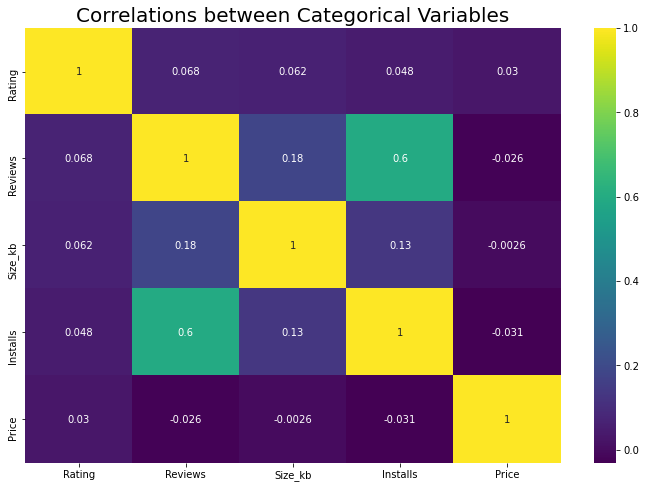

In [8]:
clean_android = android.dropna()
plt.figure(figsize=(12,8))
sns.heatmap(clean_android.corr(),cmap='viridis',annot =True)
plt.title('Correlations between Categorical Variables',fontsize=20,fontweight=525)


##### Result
1. Reviews and Installs have strong positive correlation
2. Size and number of Installations have weak positive correlation
3. Size and number of Reviews have weak positive correlation

,Size_kb,Rating
Size_kb,1.000000,0.062378
Rating,0.062378,1.000000


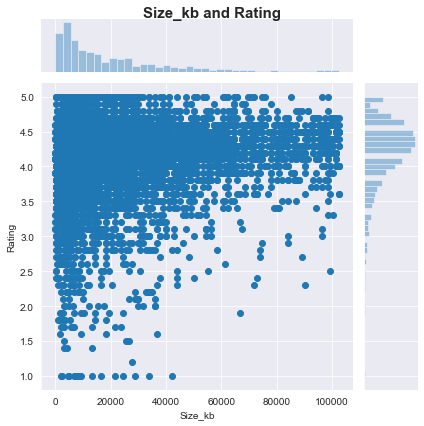

In [9]:
sns.set_style("darkgrid")
p = sns.jointplot(x = 'Size_kb', y = 'Rating', data = clean_android, kind="scatter")
p.fig.suptitle("Size_kb and Rating",fontsize=15,fontweight=600)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

clean_android[['Size_kb','Rating']].corr()


##### Result
- Correlation between number of Ratings and Size seems to be positive however it is not strong enough to claim so

           Price    Rating
Price   1.000000 -0.020987
Rating -0.020987  1.000000


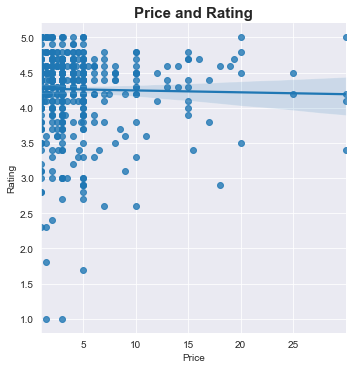

In [10]:
paid_apps = clean_android[clean_android['Price'] > 0]

sns.lmplot( "Price", "Rating", paid_apps)
plt.title('Price and Rating',fontsize=15,fontweight=600)
print(paid_apps[['Price','Rating']].corr())

##### Result
- There seems to be no correlation between Price and number of Ratings

## Distribution of Paid and Free Apps

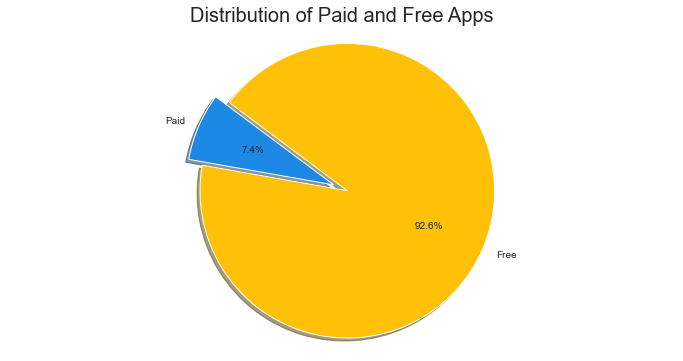

In [11]:
labels = clean_android['Type'].value_counts().index
sizes = clean_android['Type'].value_counts()
colors = ['#FFC107','#1E88E5']
explode = (0, 0.1)  

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=170,colors=colors)
ax.axis('equal')  
plt.title('Distribution of Paid and Free Apps',fontsize=20,fontweight=525)
plt.show()


##### Result
- Paid apps are dominated by Free aps by more than 10 times

## Distribution of Rating

Text(0.5, 1.0, 'Distribution of Ratings')

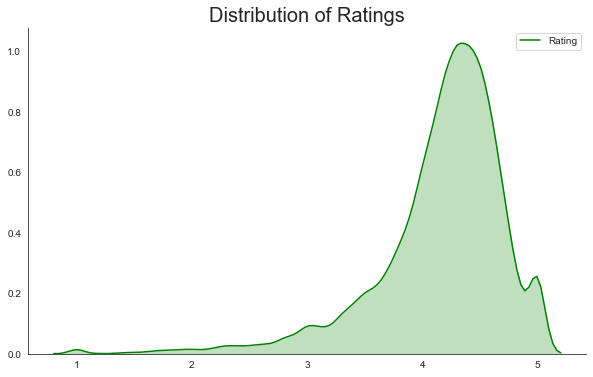

In [35]:
sns.set_style('white')
plt.figure(figsize=(10,6))
ax = sns.kdeplot(clean_android['Rating'],shade=True,color='green')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.title('Distribution of Ratings',fontsize=20,fontweight=525)


##### Result
- Most apps tend to get an average of 4 in rating while almost no apps get lower than 3

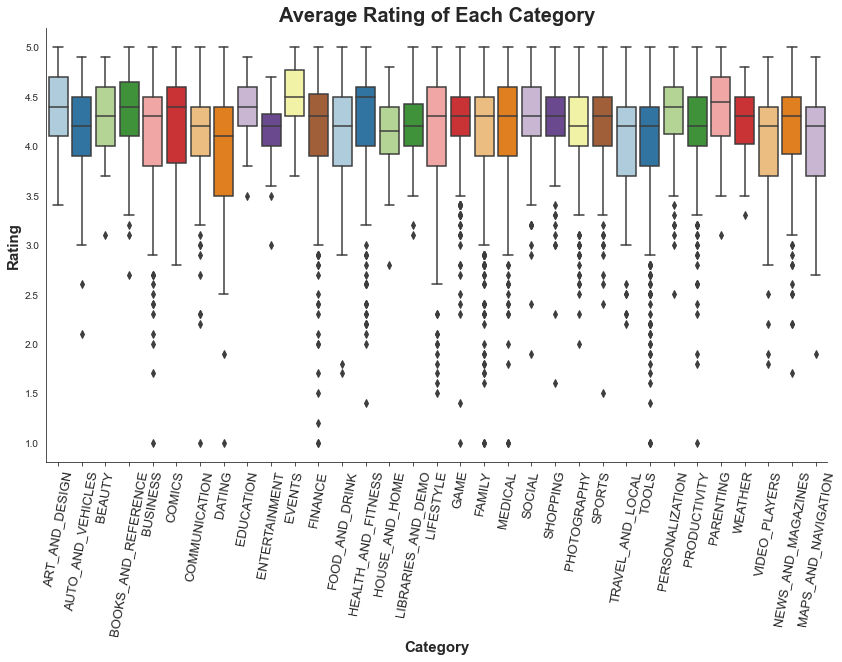

In [36]:

plt.figure(figsize=(14,8))
ax = sns.boxplot(x="Category", y="Rating", data=clean_android,palette = "Paired")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(),rotation=80,fontsize=13)
ax.tick_params(bottom="off")

ax.set_xlabel(ax.get_xlabel(),fontsize=15,fontweight=600)
ax.set_ylabel(ax.get_ylabel(),fontsize=15,fontweight=600)

plt.title('Average Rating of Each Category',fontsize=20,fontweight=600)
plt.show()

##### Result
- Events and Parenting apps have the highest average ratings
- Dating apps have the lowest average ratings
- While most categories have an average rating of 5 in higher quartile, Entertainment - House and Home - Weather have an average rating at around 4.7 in higher quartile

## Number of Apps From Each Category

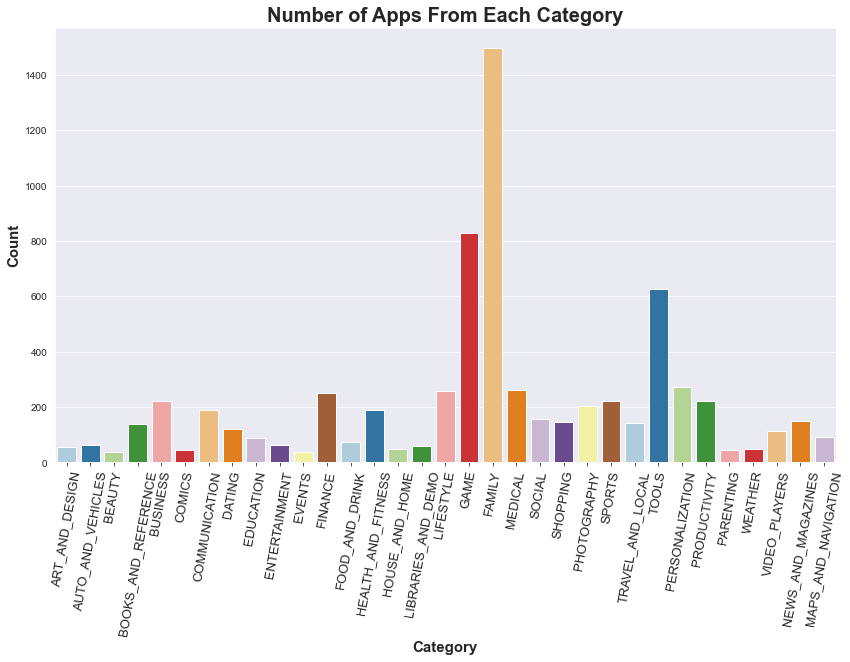

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Category", data=clean_android,palette = "Paired")

ax.set_xticklabels(ax.get_xticklabels(),rotation=80,fontsize=13)
ax.tick_params(bottom="on")

ax.set_xlabel(ax.get_xlabel(),fontsize=15,fontweight=600)
ax.set_ylabel('Count',fontsize=15,fontweight=600)

plt.title('Number of Apps From Each Category',fontsize=20,fontweight=600)
plt.show()

##### Result
- Family category have more than 1400 apps in the dataset
- Game and Tools categories have around 600 to 800 apps in the dataset
- Most other category either have around 200 apps or less

## Pricing your apps

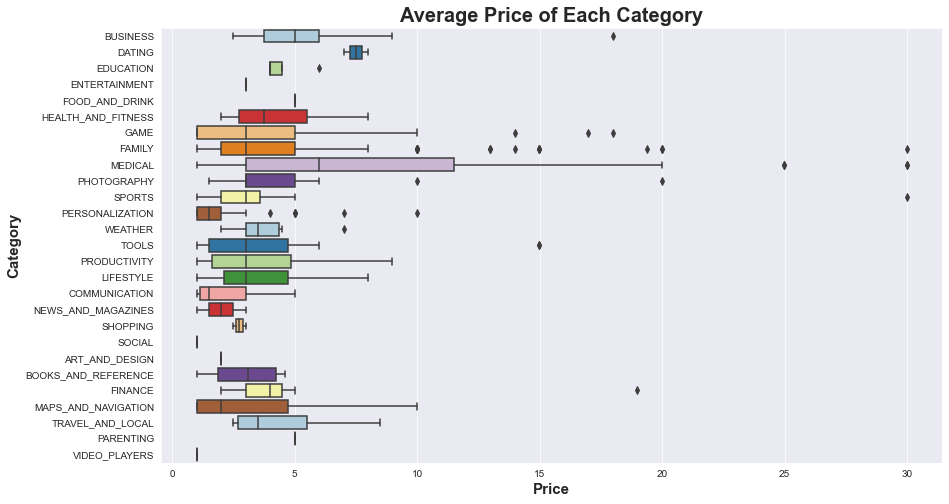

In [38]:

plt.figure(figsize=(14,8))
ax = sns.boxplot(y="Category", x="Price", data=paid_apps,palette = "Paired")



ax.set_xlabel(ax.get_xlabel(),fontsize=15,fontweight=600)
ax.set_ylabel(ax.get_ylabel(),fontsize=15,fontweight=600)

plt.title('Average Price of Each Category',fontsize=20,fontweight=600)
plt.show()

In [39]:
paid_apps[paid_apps['Price']>20]

,App,Category,Rating,Reviews,Size_kb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25600.0,100000,Paid,24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
2266,EMT PASS,MEDICAL,3.4,51,2457.6,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2277,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25600.0,10000,Paid,24.99,Everyone,Medical,"August 11, 2017",7.1.17,4.4 and up
2298,PTA Content Master,MEDICAL,4.2,64,41984.0,1000,Paid,29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up
3039,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25600.0,50000,Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up
5489,AP Art History Flashcards,FAMILY,5.0,1,98304.0,10,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up


##### Result
- Most apps are priced less than \$5
- Apps that are priced higher than \$20 are mostly from Medical category

# THANK YOU FOR READING MY PROJECT